# Reporte escrito
## Para: Jefe de ventas

## Nombre de la columna Detalles
    * week: Semana en que se realizó la venta, contabilizada como semanas desde el lanzamiento del producto
    * sales_method: Carácter, cuál de los tres métodos de venta se utilizó para ese cliente
    * customer_id: Carácter, identificador único del cliente
    * nb_sold: Numérico, número de nuevos productos vendidos
    * revenue:Numérico, ingresos de las ventas, redondeados a 2 decimales.
    * years_as_customer: Numérico, número de años que el cliente ha estado comprando con nosotros (empresa fundada en 1984)
    * nb_site_visits: Numérico, número de veces que el cliente ha visitado nuestro sitio web en los últimos 6 meses
    * state: Character, location of customer (a dónde se envían los pedidos)


In [276]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore') #Ignorar todas las advertencias
import pingouin
from tabulate import tabulate  # Para mejorar la visualización


In [277]:
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [278]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Paso 1: Validación de datos
#### 1.1. Consistencia de datos: Revisar si hay valores inesperados en columnas categóricas (sales_method, state).

In [279]:
# Revisar valores únicos y su frecuencia en 'sales_method'
print("Valores únicos en 'sales_method':")
print(sales['sales_method'].unique())

# Revisar la frecuencia de los valores de 'sales_method'
print(sales['sales_method'].value_counts())

# Convertir toda la columna 'sales_method' a minúsculas
sales['sales_method'] = sales['sales_method'].str.lower()

# Realizar los cambios específicos para corregir los valores
sales['sales_method'] = sales['sales_method'].replace({
    'email': 'Email',
    'call': 'Call',
    'email + call': 'Email + Call',
    'em + call': 'Email + Call'
})
print('-------------------------')
print(sales['sales_method'].value_counts())
print('-------------------------')

# 'nb_sold': número de nuevos productos vendidos(tienen un código)
sales['nb_sold'] = sales['nb_sold'].astype('category')

# Ver los primeros registros para confirmar la conversión
print(sales['nb_sold'].head())

Valores únicos en 'sales_method':
['Email' 'Email + Call' 'Call' 'em + call' 'email']
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64
-------------------------
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
-------------------------
0    10
1    15
2    11
3    11
4     9
Name: nb_sold, dtype: category
Categories (10, int64): [7, 8, 9, 10, ..., 13, 14, 15, 16]


In [280]:
# Revisar valores únicos y su frecuencia en 'state'
print("\nValores únicos en 'state':")
print(sales['state'].unique())

print("\nFrecuencia de valores en 'state':")
print(sales['state'].value_counts())

# Verificar si hay valores nulos en 'state'
print("\nValores nulos en 'state':")
print(sales['state'].isnull().sum())


Valores únicos en 'state':
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']

Frecuencia de valores en 'state':
state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Ariz

In [281]:
# Lista oficial de estados de EE. UU.
states_list = ['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois', 'Mississippi', 'Georgia', 'Oklahoma',
               'Massachusetts', 'Missouri', 'Texas', 'New York', 'Maryland', 'California', 'Tennessee', 'Pennsylvania',
               'North Dakota', 'Florida', 'Michigan', 'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
               'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
               'Iowa', 'Montana', 'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina', 'Minnesota',
               'South Dakota', 'Delaware', 'Maine', 'Utah', 'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 
               'Idaho', 'Wyoming']

# Verificar si hay algún valor en 'state' que no esté en la lista oficial
incorrect_states = [state for state in sales['state'].unique() if state not in states_list]
print(incorrect_states)

[]


In [282]:
# 'nb_sold': número de nuevos productos vendidos(tienen un código)
sales['nb_sold'] = sales['nb_sold'].astype('category')

# Ver los primeros registros para confirm ar la conversión
print(sales['nb_sold'].head())

0    10
1    15
2    11
3    11
4     9
Name: nb_sold, dtype: category
Categories (10, int64): [7, 8, 9, 10, ..., 13, 14, 15, 16]


#### 1.2. Verificar valores nulos: Identificar y decidir cómo manejar valores faltantes, especialmente en la columna revenue.

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
El límite de valores nulos es: 750.0
La cantidad de valores nulos de 'revenue' es menor o igual al 5%(Yes or No): False
Gráfico de barras, donde se visualiza los valores faltantes en 'revenue': Axes(0.125,0.11;0.775x0.77)


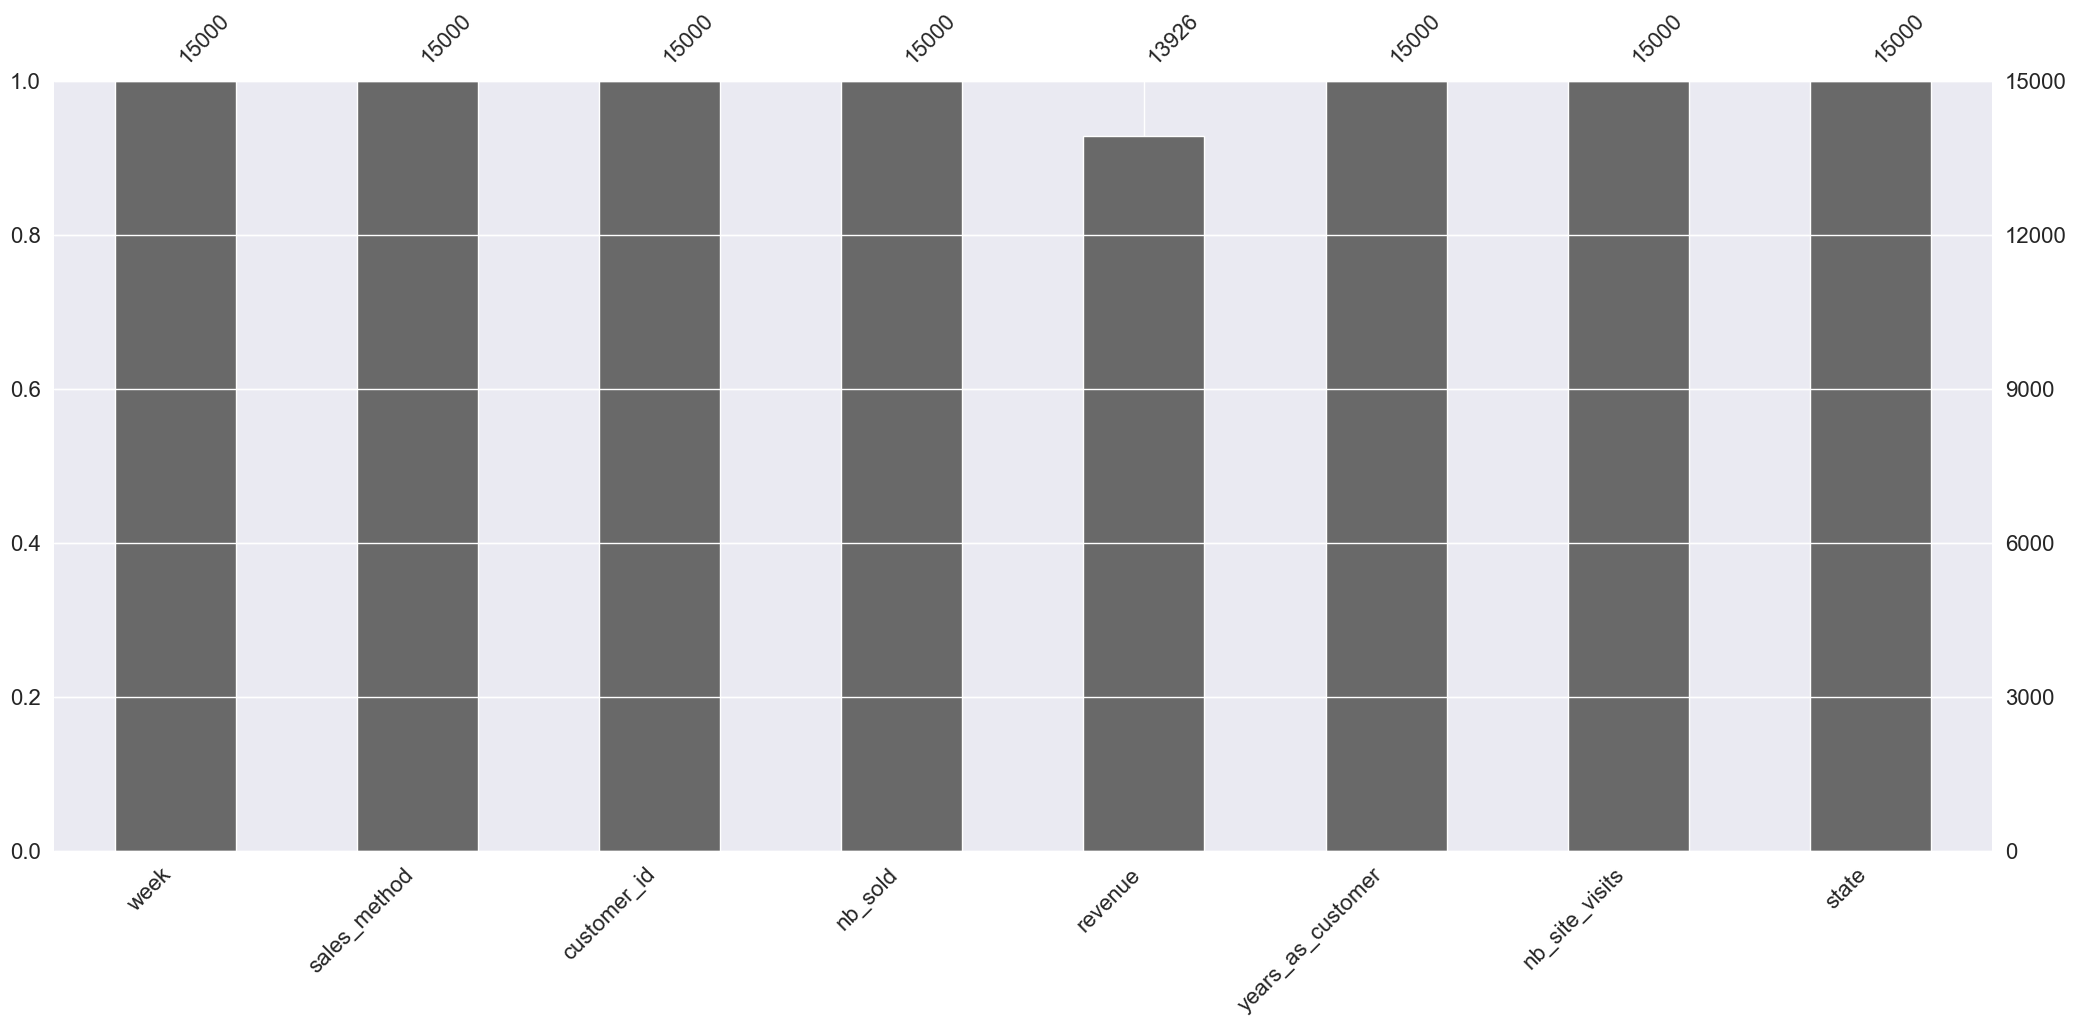

In [283]:
# Imprimir una visión general de las columnas con valores nulos
print(sales.isna().sum())

# Filtrar las variables que tengan valores nulos.
var_with_missing_value = sales.isna().sum() > 0

# Calculando el límite de valores nulos (5%)
threshold = len(sales) * 0.05
print(f'El límite de valores nulos es: {threshold}')

# Calcular si los valores nulos de 'revenue' son mayores al 5%
missing_revenue = sales['revenue'].isna().sum() #Numero de valores nulos en 'revenue'
print(f"La cantidad de valores nulos de 'revenue' es menor o igual al 5%(Yes or No): {(missing_revenue  <= threshold)}")

#Los valores nulos en 'revenue' son mayores al 5% por lo usamos otra forma de imputar los valores faltantes.
print(f"Gráfico de barras, donde se visualiza los valores faltantes en 'revenue': {msno.bar(sales)}")

Axes(0.125,0.11;0.698618x0.77)
Axes(0.125,0.11;0.775x0.77)


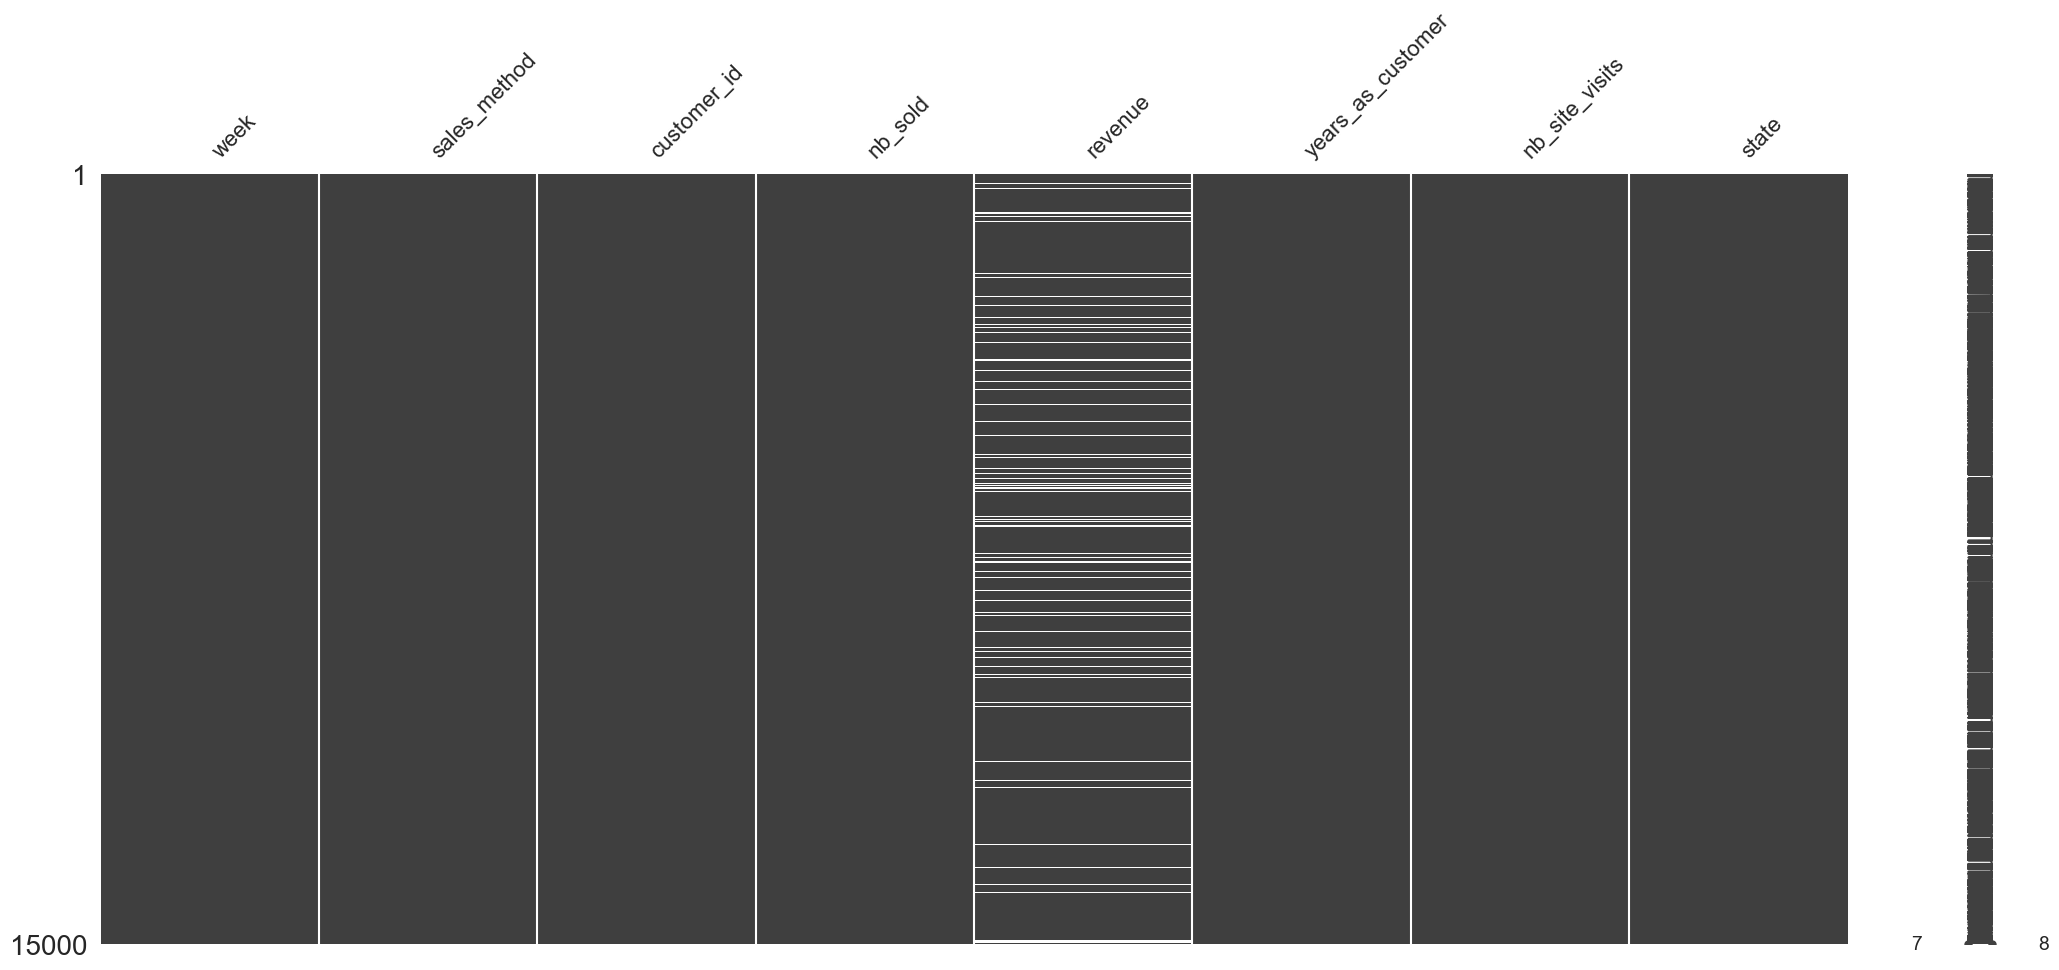

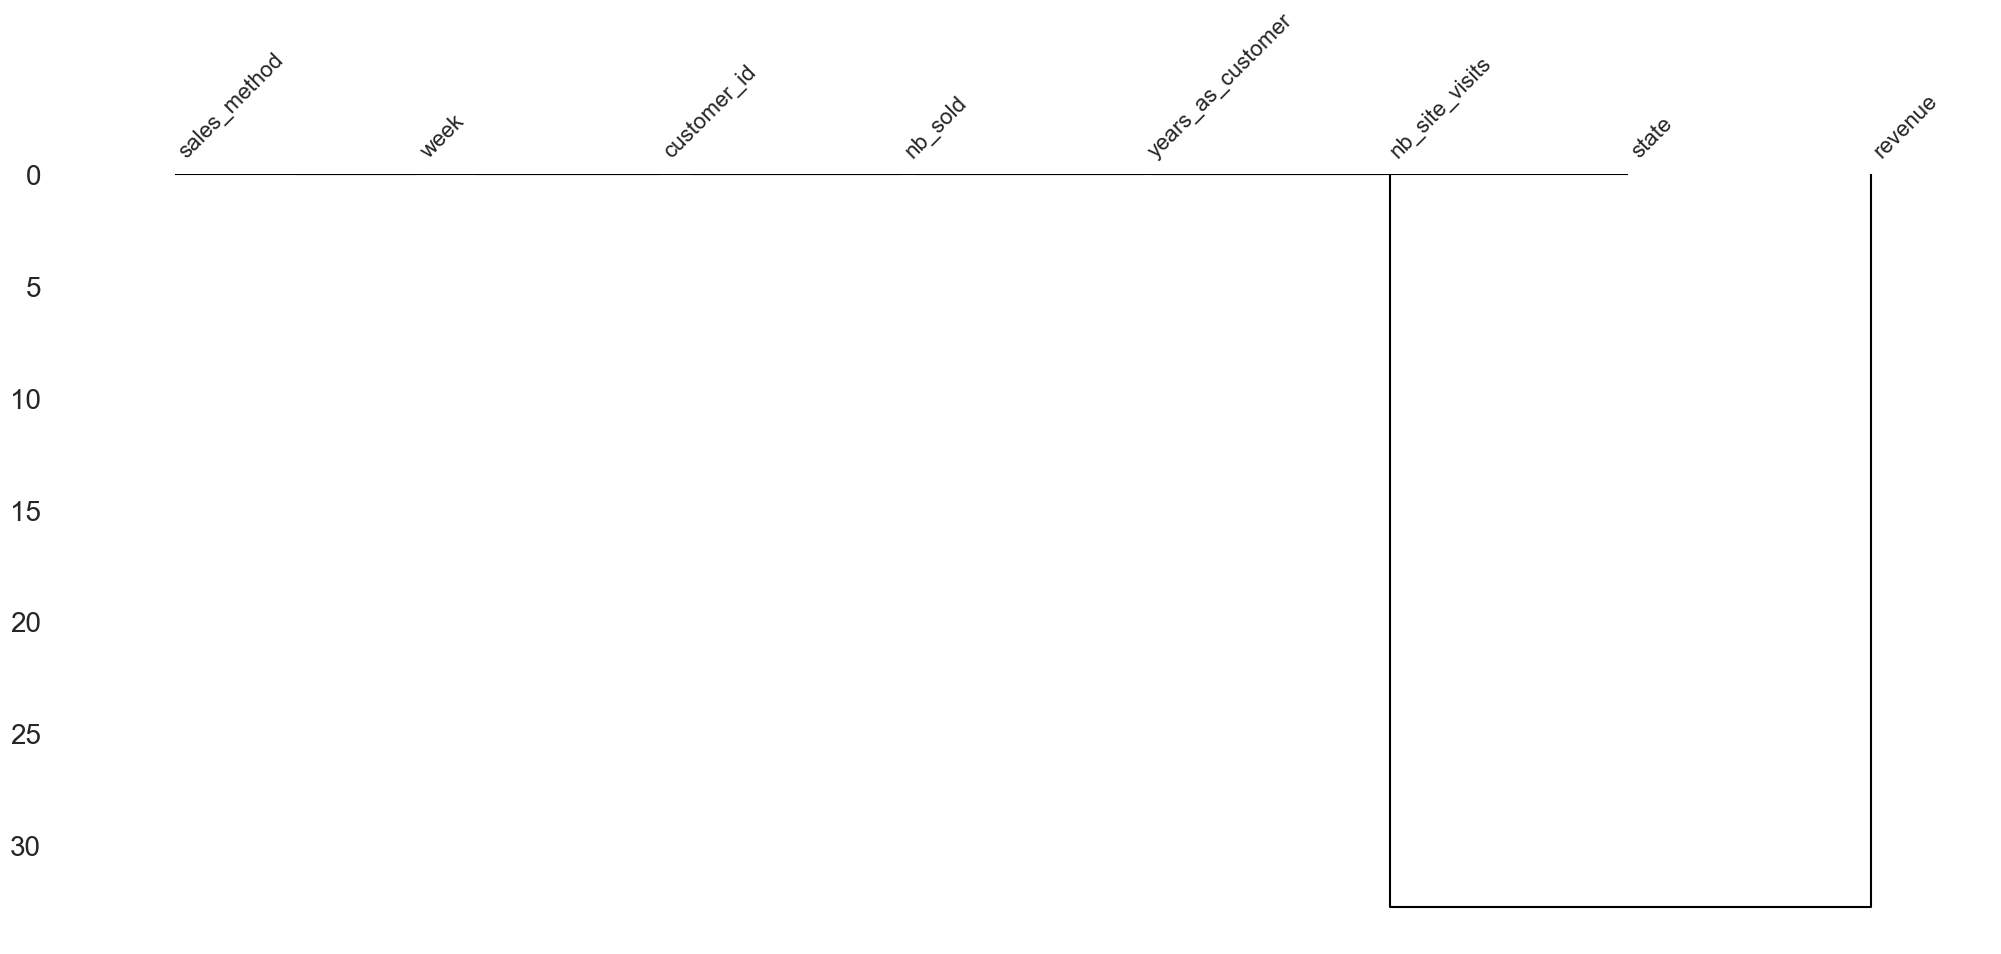

In [284]:
#Observamos algún patrón en los valores nulos para poder imputarlos más adelante.
print(msno.matrix(sales))
print(msno.dendrogram(df=sales))

* Observamos que 'revenue' aparece en la parte final, separada del resto de columnas, lo que sugiere que que no existe una *relación significativa* entre los valores nulos de 'revenue' y otras columnas
* Dado que no hay un patrón claro, usaré técnicas de imputación avanzada como *K-Nearest Neighbors (KNN)* o *Multiple Imputation by Chained Equations(MICE)*, que usan algoritmos de aprendizaje automático para imputar valores faltantes. Usamos el paquete *fancyimpute*

In [285]:
from fancyimpute import KNN #Librería KNN
from fancyimpute import IterativeImputer #Libreraría MICE

####  a. Imputación de valores nulos usando KNN

In [286]:
# Crear una copia del dataframe original
sales_knn = sales.copy(deep=True)

# Seleccionar solo la columna 'revenue' para imputar // ## KNN necesita trabajar con un dataframe
revenue_column = sales_knn[['revenue']] #Doble corchete Devuelve un DataFrame // con un corchete devuelve una serie

# Aplicar KNN imputer solo a la columna 'revenue'
knn_imputer = KNN()
revenue_imputed = knn_imputer.fit_transform(revenue_column)

# Reemplazar la columna 'revenue' original con los valores imputados
sales_knn['revenue'] = revenue_imputed

Imputing row 1/15000 with 1 missing, elapsed time: 17.280
Imputing row 101/15000 with 0 missing, elapsed time: 17.280
Imputing row 201/15000 with 0 missing, elapsed time: 17.280
Imputing row 301/15000 with 0 missing, elapsed time: 17.280
Imputing row 401/15000 with 0 missing, elapsed time: 17.280
Imputing row 501/15000 with 0 missing, elapsed time: 17.280
Imputing row 601/15000 with 0 missing, elapsed time: 17.280
Imputing row 701/15000 with 0 missing, elapsed time: 17.285
Imputing row 801/15000 with 0 missing, elapsed time: 17.285
Imputing row 901/15000 with 0 missing, elapsed time: 17.285
Imputing row 1001/15000 with 0 missing, elapsed time: 17.285
Imputing row 1101/15000 with 0 missing, elapsed time: 17.285
Imputing row 1201/15000 with 0 missing, elapsed time: 17.285
Imputing row 1301/15000 with 0 missing, elapsed time: 17.285
Imputing row 1401/15000 with 0 missing, elapsed time: 17.285
Imputing row 1501/15000 with 0 missing, elapsed time: 17.285
Imputing row 1601/15000 with 0 missi

count    15000.000000
mean        87.209201
std         51.725970
min          0.000000
25%         50.600000
50%         87.575000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64
Axes(0.125,0.11;0.775x0.77)


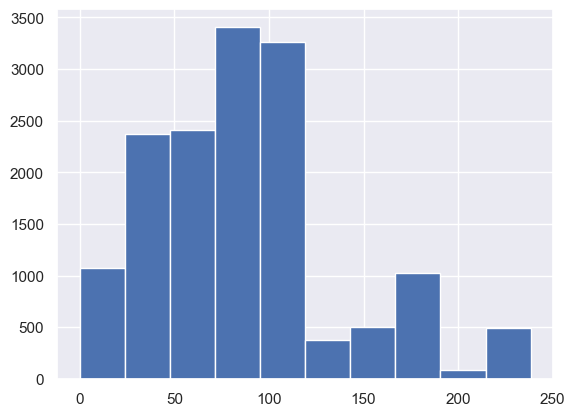

In [287]:
# Ver el resultado de la imputación con KNN
print(sales_knn['revenue'].describe())
print(sales_knn['revenue'].hist())

#### b. Imputación de valores nulos usando MICE

In [288]:
# Crear una copia original del dataframe
sales_mice = sales.copy(deep=True)

# Seleccionar la columna 'revenue'
revenue_column = sales_mice[['revenue']]

# Aplicar Iterative Imputer solo a la columna 'revenue'
mice_imputer = IterativeImputer()

# Imputar los valores faltantes de 'revenue'
sales_mice['revenue'] = mice_imputer.fit_transform(revenue_column)

count    15000.000000
mean        93.934943
std         45.705474
min         32.540000
25%         53.040000
50%         91.865000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64
Axes(0.125,0.11;0.775x0.77)


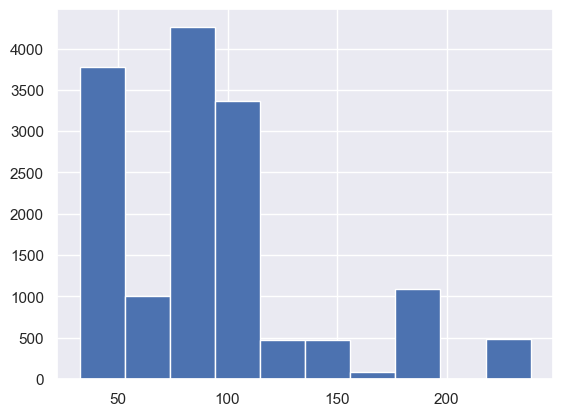

In [289]:
# Ver el resultado de la imputación con MICE
print(sales_mice['revenue'].describe())
print(sales_mice['revenue'].hist())

* Optamos por la imputación aplicando KNN (K-Nearest Neighbors Imputer), ya que esta técnica es eficaz cuando los valores faltantes pueden estimarse en función de patrones observados en clientes con características similares.
* A diferencia de MICE, que puede generar múltiples imputaciones y agregar variabilidad, KNN encuentra relaciones locales en los datos y asigna valores más coherentes con clientes similares.
* Además, KNN permite mantener valores realistas, incluyendo la posibilidad de ingresos en 0, lo que es coherente con clientes que pudieron registrarse sin haber realizado una compra.

In [290]:
#Reemplazando los valores imputados en el dataframe original
sales['revenue'] = sales_knn['revenue']
print(sales['revenue'].describe())

count    15000.000000
mean        87.209201
std         51.725970
min          0.000000
25%         50.600000
50%         87.575000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64


#### 1.3. Detección de valores atípicos: Buscar valores extremos o inconsistencias.

In [292]:
sales.describe()

,week,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,87.209201,4.965933,24.990867
std,1.656420,51.725970,5.044952,3.500914
min,1.000000,0.000000,0.000000,12.000000
25%,2.000000,50.600000,1.000000,23.000000
50%,3.000000,87.575000,3.000000,25.000000
75%,5.000000,106.070000,7.000000,27.000000
max,6.000000,238.320000,63.000000,41.000000


* Dado que la empresa fue fundada en 1984 y estamos en 2025, el valor máximo para la columna years_as_customer debería ser 41 años, ya que un cliente que haya estado con la empresa desde el inicio tendría ese tiempo de relación.

In [293]:
#La cantidad de valores atípicos que son mayores a 41 años de clientes con la empresa.
filas_mayor_41 = sales[sales['years_as_customer'] > 41].shape[0]
print(f'filas mayor a 41 años como cliente: "{filas_mayor_41}" valores atípicos.')

#Filtrar los valores atípicos de la columna 'years_as_customer' que son mayores a 41
print(f'Filas antes del filtro {sales.shape[0]}')
sales = sales[sales['years_as_customer'] <= 41]
print(f'Filas después del filtro {sales.shape[0]}')

filas mayor a 41 años como cliente: "2" valores atípicos.
Filas antes del filtro 15000
Filas después del filtro 14998


### a. Verificar outliers en 'revenue' y 'years_as_customer'

La cantidad de outliers en revenue es: 656
La cantidad de outliers en years_as_customer es: 531


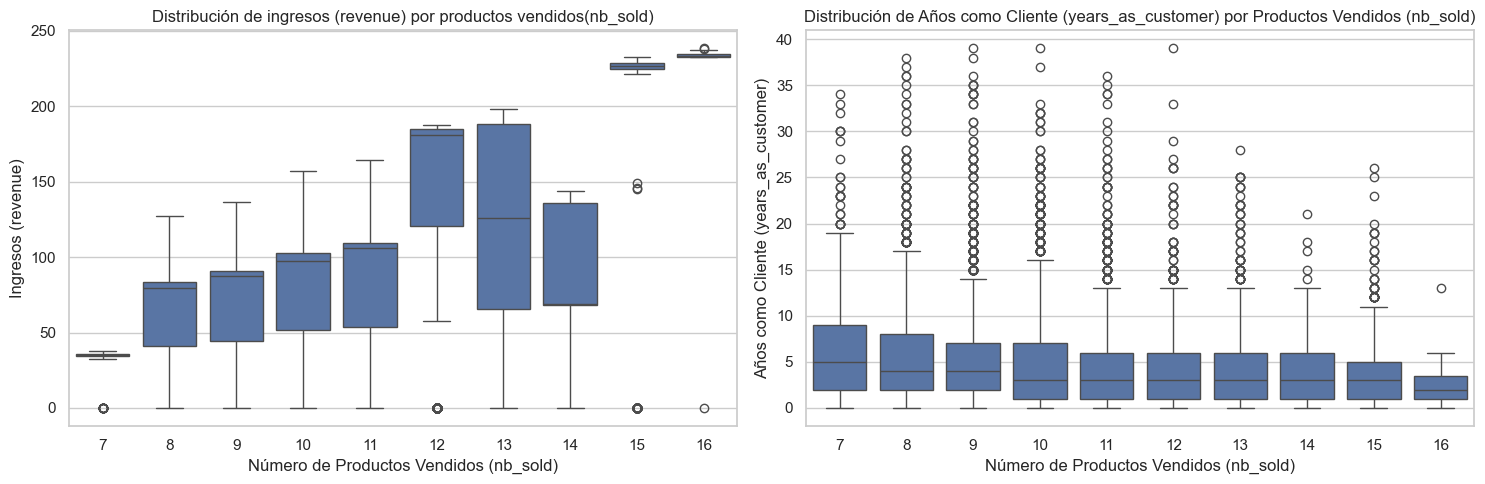

In [294]:
# Calcular IQR para 'revenue'
q1_revenue, q3_revenue = np.quantile(sales['revenue'], [0.25, 0.75])
iqr_revenue = q3_revenue - q1_revenue

# Calcular IQR pra 'years_as_customer'
q1_years, q3_years = np.quantile(sales['years_as_customer'], [0.25, 0.75])
iqr_years = q3_years - q1_years

# Calculando los límites de 'revenue'
lower_limit_revenue = q1_revenue - (1.5 * iqr_revenue)
upper_limit_revenue = q3_revenue + (1.5 * iqr_revenue)

# Calculando los límites de 'customer_as_years'
lower_limit_years = q1_years - (1.5 * iqr_years)
upper_limit_years = q3_years + (1.5 * iqr_years)

# Identificando los outliers en revenue y 'customer_as_years'
outliers_revenue = sales[(sales['revenue'] < lower_limit_revenue) | (sales['revenue'] > upper_limit_revenue)]
outliers_years = sales[(sales['years_as_customer'] < lower_limit_years) | (sales['years_as_customer'] > upper_limit_years)]


# Mostrar los resultados outliers en revenue y 'customer_as_years'
print(f'La cantidad de outliers en revenue es: {outliers_revenue.shape[0]}')
print(f'La cantidad de outliers en years_as_customer es: {outliers_years.shape[0]}')


# Usar un gráfico de caja para visualizar outliers
# Configurar estilo de los gráficos 
sns.set(style='whitegrid')

# Crear subgráficos para 'revenue' y 'years_as_customer'
fig, axes = plt.subplots(1, 2, figsize = (15,5))
plt.subplots_adjust(hspace=0.5)

#Boxplot de 'revenue'
sns.boxplot(data=sales, x='nb_sold', y='revenue', ax= axes[0])
axes[0].set_title('Distribución de ingresos (revenue) por productos vendidos(nb_sold)')
axes[0].set_xlabel('Número de Productos Vendidos (nb_sold)')
axes[0].set_ylabel('Ingresos (revenue)')

#Boxplot de 'years_as_customer'
sns.boxplot(data=sales, x='nb_sold', y='years_as_customer', ax= axes[1])
axes[1].set_title('Distribución de Años como Cliente (years_as_customer) por Productos Vendidos (nb_sold)')
axes[1].set_xlabel('Número de Productos Vendidos (nb_sold)')
axes[1].set_ylabel('Años como Cliente (years_as_customer)')

#Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

#### Conclusión:
1.  Ingresos (revenue):

    Los ingresos por producto vendido tienen valores atípicos, pero estos no son excesivos ni fuera de lo esperado. Los outliers probablemente sean casos de productos vendidos en cantidades excepcionales. Se podría investigar más a fondo si es necesario, pero no parece haber un patrón de error.

2. Años como cliente (years_as_customer):

    La variable "Años como cliente" se mantiene dentro del rango razonable, con un máximo de 41 años, y no parece haber valores atípicos problemáticos. Los outliers podrían ser clientes con un comportamiento de compra más irregular, pero no son una preocupación importante.

* Por lo tanto, no es necesario eliminar ningún valor. Sin embargo, los outliers pueden ser estudiados para entender mejor los patrones de compra de clientes específicos y su relación con los ingresos. En resumen, los gráficos muestran datos válidos y razonables dentro de los límites esperados.

### 1.4. Verificación de unicidad: Revisar si hay clientes duplicados (customer_id).

In [295]:
# Contar el número de duplicados
cantidad_duplicados = sales['customer_id'].duplicated().sum()
print(f'La cantidad de duplicados es: {cantidad_duplicados}')

print(sales.shape[0])
sales.drop_duplicates(subset=['customer_id'], inplace=True)
print(sales.shape[0])
#No hay valores duplicados.

La cantidad de duplicados es: 0
14998
14998


### 1.5.Revisión de tipos de datos: Verificar que las columnas tengan los tipos de datos correctos.

In [296]:
# Verificar los tipos de datos de todas las columnas
print(sales.dtypes)

week                    int64
sales_method           object
customer_id            object
nb_sold              category
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                  object
dtype: object


In [297]:
# Convertir 'state' a tipo 'category'
sales['state'] = sales['state'].astype('category')

# Verificar el tipo de dato de 'state'
print(sales['state'].dtype)

category


### Paso 2: Análisis exploratorio de datos
Responderemos las preguntas del equipo de ventas con análisis estadísticos y gráficos.
Preguntas a responder:
#### 2.1.	¿Cuántos clientes hubo para cada enfoque de ventas?
* Conteo de clientes únicos (customer_id) por sales_method.


La cantidad de clientes únicos por método de ventas es: sales_method
Call            4961
Email           7465
Email + Call    2572
Name: customer_id, dtype: int64


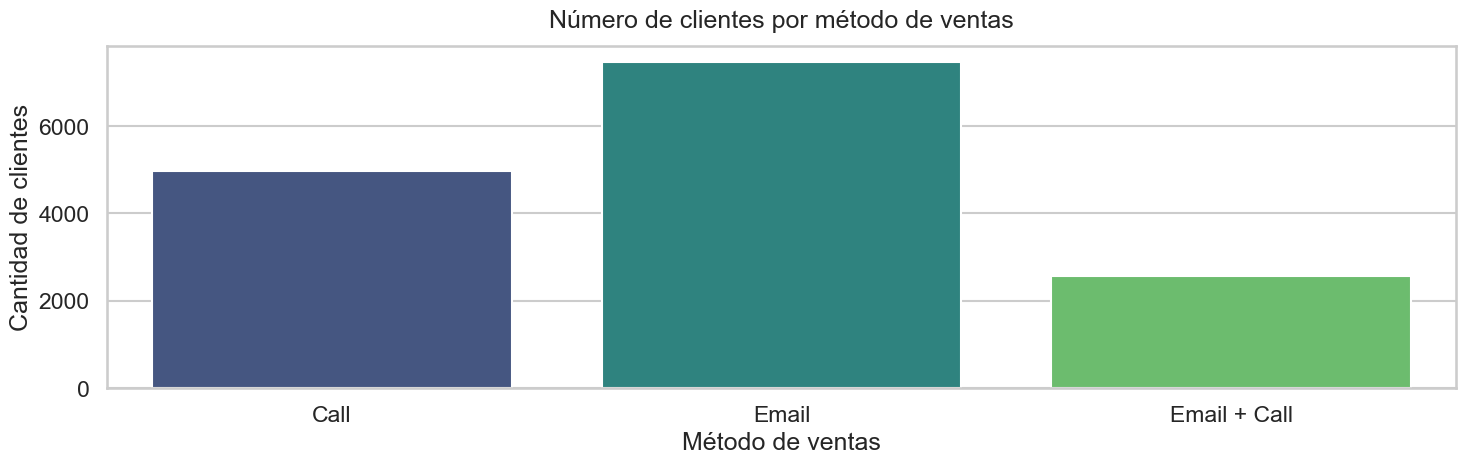

In [298]:
# Conteo de clientes únicos
unique_customers = sales.groupby('sales_method')['customer_id'].nunique()
print(f'La cantidad de clientes únicos por método de ventas es: {unique_customers}')

# Visualizando los resultados en un gráfico de barras
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
sns.set_context('talk')
sns.barplot(x=unique_customers.index, y=unique_customers.values, palette='viridis')

# Etiquetas y títulos
plt.title('Número de clientes por método de ventas', y =1.03)
plt.xlabel('Método de ventas')
plt.ylabel('Cantidad de clientes')

#Ajuste de diseño y mostrar gráfico
plt.tight_layout()
plt.show()

* El método de ventas por Email es el más efectivo en términos de captación de clientes únicos, mientras que la combinación de métodos (Email + Call) no parece ser tan efectiva. Esto podría indicar que la empresa debería centrar más recursos en optimizar las ventas por correo electrónico o revisar si la combinación de métodos agrega valor. 🚀

#### 2.2. ¿Cómo se distribuyen los ingresos en general y por método de venta?
o	Gráfico de distribución de ingresos global.

o	Boxplot de ingresos por sales_method.


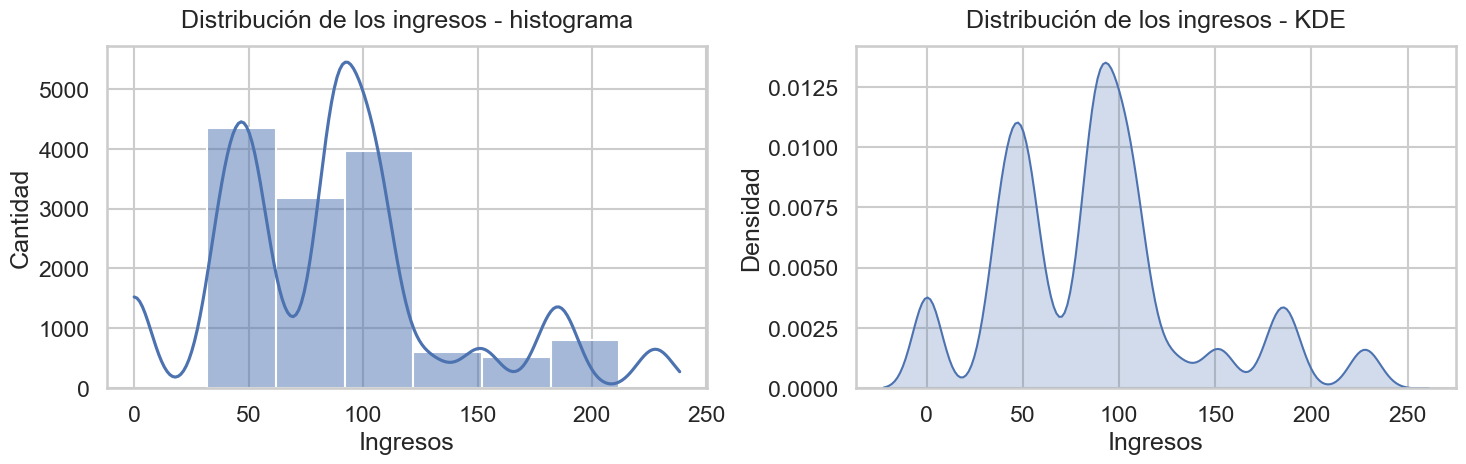

In [299]:
# Distribución de los ingresos global a través de un histograma y un gráfico de densidad
fig, axes = plt.subplots(1, 2 , figsize = (15,5))
sns.set(style='darkgrid')
sns.set(context='talk')

#Gráfico de histograma
sns.histplot(sales['revenue'], ax=axes[0], kde=True, bins=np.arange(32,238, 30))
axes[0].set_title('Distribución de los ingresos - histograma', y =1.03)
axes[0].set_xlabel('Ingresos')
axes[0].set_ylabel('Cantidad')

#Gráfico de densidad
sns.kdeplot(sales['revenue'], ax=axes[1], fill=True)
axes[1].set_title('Distribución de los ingresos - KDE', y =1.03)
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Densidad')

#Ajustar el diseño y mostrar gráfico
plt.tight_layout()  # Asegura que los gráficos no se solapen
plt.show()

* La distribucón de los ingresos 'revenue' no tiene una distribución normal, presenta asimetría positiva con sesgo hacia valores entre 50 y 100.
* Con esto podemos estar seguros que para hacer alguna prueba de hipótesis para encontrar diferencia significativa entre los ingresos y las estrategias de venta, debemos usar una prueba no paramétrica.

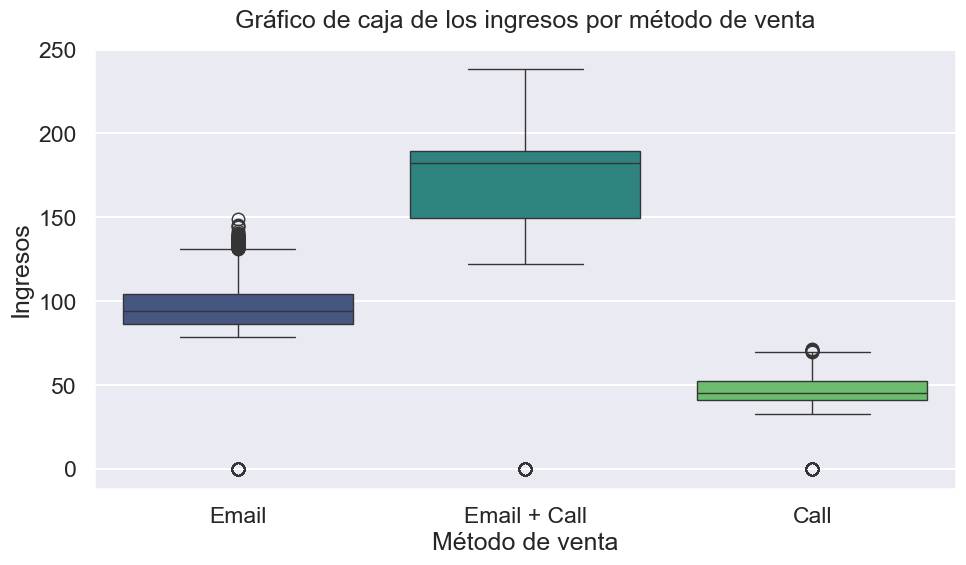

In [310]:
# Gráfico de caja(boxplot) de los ingresos por método de método de venta
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.set(context='talk')
sns.boxplot(data=sales, x='sales_method', y='revenue', palette='viridis')

# Título y etiquetas
plt.title('Gráfico de caja de los ingresos por método de venta', y=1.03)
plt.xlabel('Método de venta')
plt.ylabel('Ingresos')

#Diseño y ajuste del gráfico
plt.tight_layout()
plt.show()

##### Observaciones
1.- Mayor valor de ingresos:
* El método 'Email + Call' tiene una mediana de ingresos significativamente mayor que los otros dos métodos.
* Su distribución muestra valores más altos, lo que indica que los clientes captados con éste método realizan compras de mayor valor.

2.- Menor cantidad de clientes pero más rentables:
* Aunque el método 'Email + Call' capta menos clientes, *los que si compran generan más ingresos en promedio*.
* Es posible que éste enfoque esté dirigido a clientes de alto valor o cierre de ventas más grandes.

##### Conclusión
*El método 'Email + Call' parece ser más efectivo para ventas de alto valor, aunque menos eficiente en captación de clientes. Una estrategia óptima podría ser combinar el alto alcance de 'Email' con la capacidad de conversión de 'Email + Call' para maximizar los ingresos totales. 🚀*

#### 2.3. ¿Los ingresos varían con el tiempo para cada método?
o	Gráfico de evolución de ingresos a lo largo de las semanas (week).


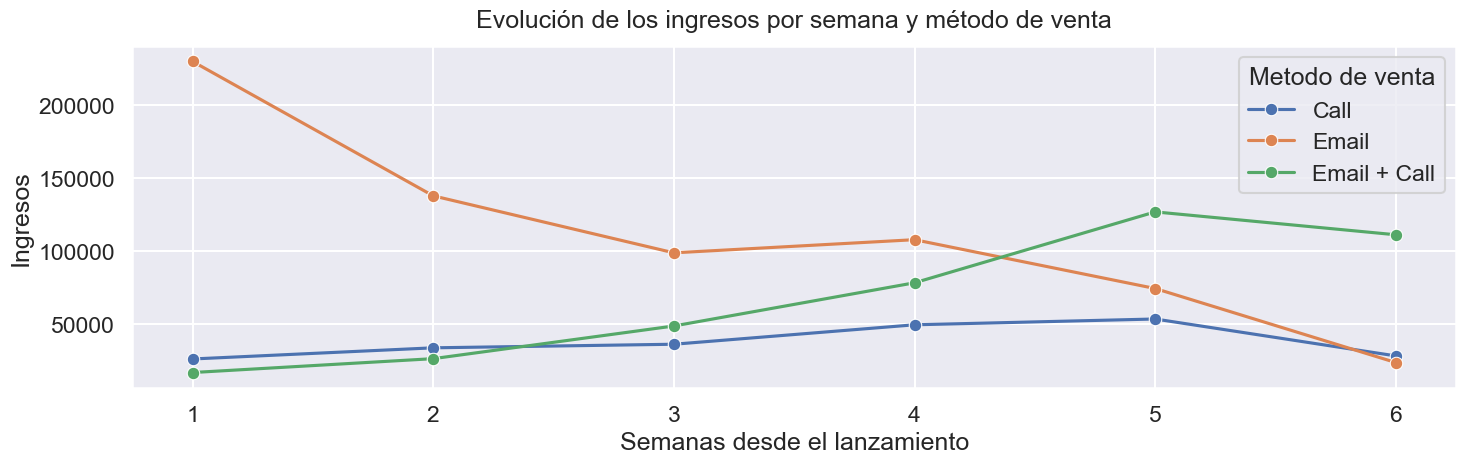

In [301]:
# Agrupar por semana y método de venta, sumando ingresos
weekly_revenue = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Graficar la evolución de los ingresos
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.set(context='talk')
sns.lineplot(data=weekly_revenue, x='week', y='revenue', hue='sales_method', marker = 'o')

# Etiquetas y título
plt.title('Evolución de los ingresos por semana y método de venta', y=1.03)
plt.xlabel('Semanas desde el lanzamiento')
plt.ylabel('Ingresos')

#Ajustar diseño de gráfico
plt.legend(title = 'Metodo de venta')
plt.tight_layout()
plt.show()

##### Interpretaciones clave
    Este gráfico muestra la evolución de los ingresos a lo largo de seis semanas para tres métodos de venta: Call, Email y Email + Call.

✔ "Email" es muy fuerte en la primera semana, pero su eficacia disminuye rápidamente. Esto podría indicar que funciona bien en lanzamientos iniciales, pero no se mantiene en el tiempo.

✔ "Call" es el método más constante, pero sus ingresos son bajos en comparación con los otros.

✔ "Email + Call" *se consolida como la mejor estrategia en el mediano plazo*, ya que logra un crecimiento sostenido y supera a los otros métodos a partir de la semana 4.


##### Conclusiones
* Si el objetivo es un impacto inmediato, el método "Email" es la mejor opción.
* Si se busca una estrategia más estable pero de bajo impacto, el método "Call" es adecuado.
* Para maximizar ingresos a mediano y largo plazo, la combinación "Email + Call" es la más efectiva.

#### 2.4.	¿Qué método de venta es el más efectivo?
o	Comparación de ingresos totales, ingresos por cliente y esfuerzo requerido.

##### Comparación del esfuerzo requerido

| Método de venta  | Esfuerzo requerido  |
|-----------------|--------------------|
| **Email**       | **Bajo** → Se pueden enviar muchos correos automáticamente. |
| **Call**        | **Alto** → Requiere llamadas personalizadas y seguimiento. |
| **Email + Call**| **Medio-Alto** → Se combinan ambos esfuerzos, pero con mejores resultados. |

Si la empresa tiene **recursos limitados**, **Email** es la opción más eficiente.  
Si se prioriza la **efectividad a largo plazo**, **Email + Call** es mejor.

✔ **Ganador en menor esfuerzo** → **Email**  
✔ **Ganador en balance esfuerzo vs resultado** → **Email + Call**


##### Método de venta más efectivo
📊 Comparación:

* Ingresos totales: 🏆 Email + Call (mayor crecimiento a largo plazo).
* Ingresos por cliente: Depende, pero Email + Call puede optimizar conversiones.
* Esfuerzo requerido: Email (más fácil y automatizable), Email + Call (balance entre esfuerzo y resultados).

✅ Conclusión: *Email + Call* es el más efectivo, combinando ingresos altos y eficiencia.

#### 2.5. ¿Existen diferencias entre los clientes según el método de venta?
o	Análisis de years_as_customer y nb_site_visits por sales_method.


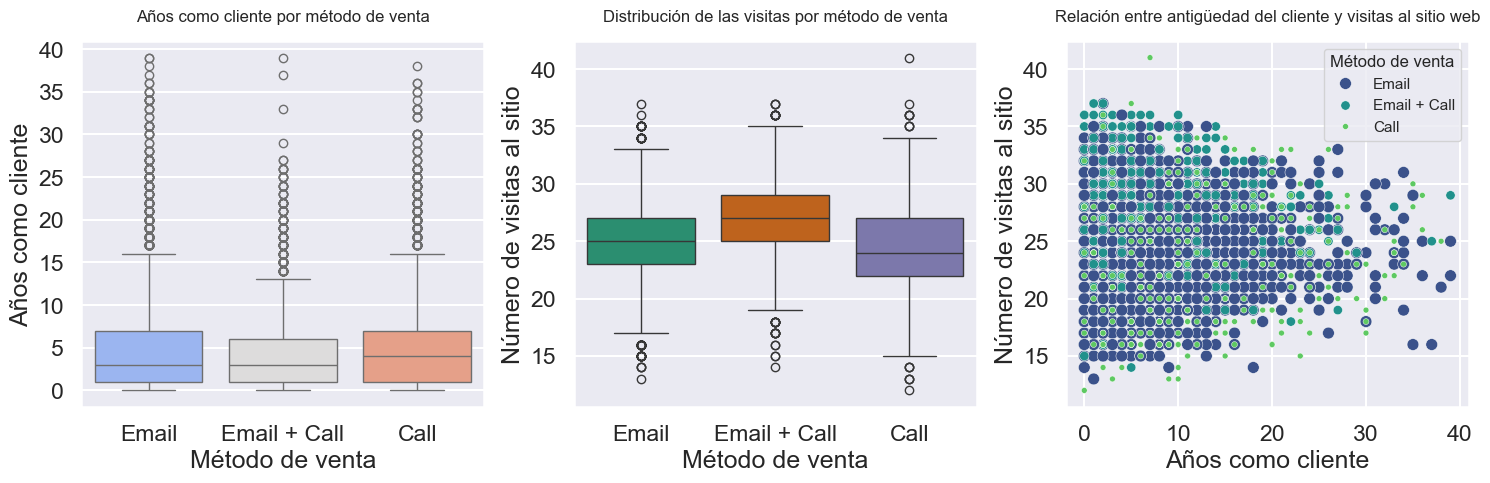

In [302]:
#Definir tamaño y forma de subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
sns.set(context='notebook')

# 1. Boxplot de "años como cliente" por método de venta
sns.boxplot(data=sales, x='sales_method', y='years_as_customer',ax=axes[0], palette='coolwarm')

# Título y etiquetas
axes[0].set_title('Años como cliente por método de venta', y=1.03)
axes[0].set_xlabel('Método de venta')
axes[0].set_ylabel('Años como cliente')

# 2. Boxplot de "visitas al sitio" por método de venta
sns.boxplot(data=sales, x='sales_method', y='nb_site_visits',ax=axes[1], palette='Dark2')

# Título y etiquetas
axes[1].set_title('Distribución de las visitas por método de venta', y=1.03)
axes[1].set_xlabel('Método de venta')
axes[1].set_ylabel('Número de visitas al sitio')

# 3.  Gráfico de dispersión (scatter plot)
sns.scatterplot(data=sales, x='years_as_customer', y='nb_site_visits',hue='sales_method',size='sales_method', palette='viridis')

# Título y etiquetas
axes[2].set_title('Relación entre antigüedad del cliente y visitas al sitio web', y=1.03)
axes[2].set_xlabel('Años como cliente')
axes[2].set_ylabel('Número de visitas al sitio')
plt.legend(title='Método de venta')

#Diseño y ajuste de gráfico
plt.tight_layout()
plt.show()

##### Resumen📝
    ✅ A simple vista, no hay una diferencia significativa en la antigüedad de los clientes según el método de venta.
    ✅ Los clientes contactados por "Email + Call" tienden a visitar más el sitio web.
    ✅ No se observa una relación clara entre los años como cliente y el número de visitas al sitio.

* Pasamos a realizar una prueba ANOVA para determinar si hay diferencia significativa entre las visitas al sitio web y los métodos de venta.

Hipótesis

* H₀: No hay diferencias significativas en la cantidad de visitas al sitio web entre los distintos métodos de venta.
* H₁: Al menos un método de venta tiene una cantidad de visitas significativamente diferente a los demás.

nivel de significancia(α) = 0.05 (5%)

<Axes: >

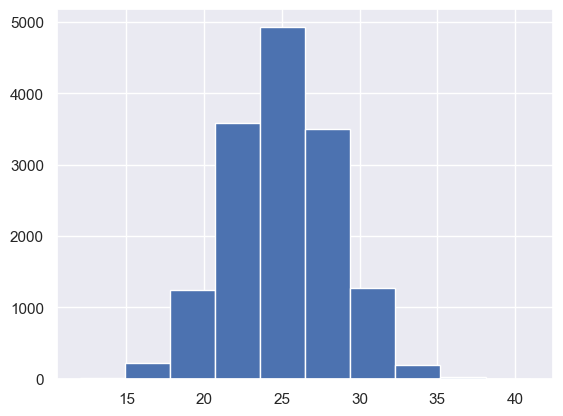

In [303]:
#Verificamos que la variable 'nb_sites_visit' tiene una distribución normal o no, para decidir el tipo de prueba a utilizar(paramétrica o no paramétrica)
sales['nb_site_visits'].hist()

* La distribución de la variable 'nb_site_visits' parece aproximarse a una distribución normal por lo que procedemos con la prueba ANOVA

In [304]:
# Realizar la prueva ANOVA
anova_results = pingouin.anova(data=sales, dv='nb_site_visits', between='sales_method')

#Mostrar los resultados
print(anova_results)

         Source  ddof1  ddof2           F          p-unc       np2
0  sales_method      2  14995  439.039444  5.029239e-186  0.055319


✅ ANOVA
* Se aplicó una prueba ANOVA de una vía para comparar el número de visitas al sitio web (nb_site_visits) entre diferentes métodos de venta (sales_method).
* El p-valor (5.029239e-186) es extremadamente pequeño, lo que indica una diferencia significativa entre al menos un par de métodos de venta.
* Para saber exactamente que grupos tienen diferencia significativa aplicamos una prueba de 'pairwise_tests' de la librería de pingouin, usando la prueba de corrección de 'bonferroni'(bonf)

In [305]:
# Realizar la prueba de Pairwise_tests
pairwise_results = pingouin.pairwise_tests(data=sales, dv='nb_site_visits', between='sales_method', padjust='bonf')

# Mostrar el resultado 
print(pairwise_results)

       Contrast      A             B  Paired  Parametric          T  \
0  sales_method   Call         Email   False        True  -5.200244   
1  sales_method   Call  Email + Call   False        True -28.072135   
2  sales_method  Email  Email + Call   False        True -26.422821   

           dof alternative          p-unc         p-corr p-adjust        BF10  \
0  9937.126523   two-sided   2.029874e-07   6.089622e-07     bonf   1.491e+04   
1  5530.189822   two-sided  3.202584e-162  9.607753e-162     bonf   8.36e+160   
2  4378.293107   two-sided  7.008269e-143  2.102481e-142     bonf  5.647e+144   

     hedges  
0 -0.097038  
1 -0.667144  
2 -0.610879  


✅ Pairwise Tests (Pruebas Post-Hoc)
* Como el ANOVA solo indica que hay diferencias significativas, pero no entre qué grupos, se aplicó pruebas post-hoc con pingouin.pairwise_tests(), usando la corrección de Bonferroni (padjust='bonf').
* Estas pruebas comparan los grupos de a dos para ver cuáles presentan diferencias significativas.

📊 Interpretación de los resultados de Pairwise Tests
*    Se comparó los métodos Call, Email, y Email + Call entre sí.
*    La columna "T" muestra los valores de prueba t para cada comparación.
*    La columna "p-unc" muestra los p-valores sin corrección.
*    La columna "p-corr" muestra los p-valores corregidos con Bonferroni.
*    Como los p-valores corregidos siguen siendo extremadamente pequeños, *todas las comparaciones muestran diferencias significativas*.
*    Los valores negativos en "hedges" sugieren diferencias de tamaño de efecto.

🔍 Conclusión
*   Hay diferencias estadísticamente significativas en las visitas al sitio web según el método de venta.
*   Específicamente, cada par de métodos de venta (Call vs Email, Call vs Email + Call, Email vs Email + Call) tiene diferencias significativas en las visitas.
*   La estrategia de ventas influye en la cantidad de visitas al sitio web, y se podría profundizar en cuál método genera más visitas.

### Paso 3: Definición de una métrica clave

    1️⃣ Ingreso promedio por cliente
    2️⃣ Tasa de conversión

#### 3.1. Ingreso promedio por cliente
* Fórmula:

        Ingreso promedio por cliente = (Total revenue) / Numero de clientes
* En el dataset 'sales':

        'revenue' representa los ingresos generados
        'customer_id' representa a los clientes (asumiendo que cada ID es único para cada cliente)

In [306]:
#Calcular ingreso promedio por cliente
ingreso_promedio = sales['revenue'].sum() / sales['customer_id'].nunique()
print(f'El ingreso promedio por cliente es {ingreso_promedio:.2f}')

El ingreso promedio por cliente es 87.21


#### 3.2. Tasa de conversión
* Fórmula:

        Tasa de conversión = Clientes con compra / Clientes contactados

* Clientes con compra: aquellos que tienen 'revenue > 0'
* Clientes contactados: Número total de clientes en el dataset.

In [307]:

# Calcular tasa de conversión
clientes_con_compra = sales[sales['revenue'] > 0]['customer_id'].nunique()
clientes_contactados = sales['customer_id'].nunique()
tasa_de_conversion = clientes_con_compra / clientes_contactados
print(f'Tasa de conversión: {tasa_de_conversion:.2%}')

Tasa de conversión: 92.84%


* Ingreso promedio por cliente:

        El valor obtenido es 87.21, lo cual indica que, en promedio, cada cliente genera aproximadamente 87.21 en ingresos.

* tasa de conversión:

        El resultado es 92.84%, lo que indica que aproximadamente el 7.16% de los clientes registrados no realizaron una compra.

##### Conclusión:
La evaluación del rendimiento del método de ventas a través del ingreso promedio por cliente y la tasa de conversión proporciona una visión clara de la efectividad comercial. Con un ingreso promedio de 87.21 y una tasa de conversión del 92.84%, se evidencia que la mayoría de los clientes contactados realizaron una compra, lo que indica una alta eficiencia en la conversión. Sin embargo, es fundamental monitorear estas métricas a lo largo del tiempo para identificar tendencias, optimizar estrategias de venta y maximizar ingresos.